In [45]:
# Trajectory Inference
# Diffusion Pseudotime (DPT)
import scanpy as sc
import numpy as np

In [46]:
# 1. Load example dataset (10x Genomics PBMCs). Replace with your own data file as needed.
adata = sc.datasets.pbmc3k()  # Built-in example; or use sc.read_10x_h5(...) / sc.read_h5ad(...)

In [47]:
# 2. Basic preprocessing: filter, normalize, and log-transform
sc.pp.filter_cells(adata, min_genes=200)        # Remove cells with fewer than 200 detected genes
sc.pp.filter_genes(adata, min_cells=3)          # Remove genes expressed in fewer than 3 cells
sc.pp.normalize_total(adata, target_sum=1e4)    # Normalize each cell’s total counts to 10,000
sc.pp.log1p(adata)                              # Apply log(x + 1) transformation

In [48]:
# 3. Identify highly variable genes (HVGs); subset to top 2,000
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor='seurat_v3')
adata = adata[:, adata.var.highly_variable]     # Keep only HVGs

/Volumes/devinjzhu/miniconda3/envs/celldecoder/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [49]:
# 5. Run PCA as a preprocessing step 
sc.pp.pca(adata, n_comps=50, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)  
sc.tl.diffmap(adata, n_comps=10)  

/Volumes/devinjzhu/miniconda3/envs/celldecoder/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [50]:
#    First, run Leiden clustering if cluster labels are not already present
sc.tl.leiden(adata, resolution=0.5)

In [51]:
# Select Root Cell
adata.obs[adata.obs['leiden']=='0'].iloc[0]
adata.uns['iroot'] = int(1)

In [52]:
# Compute DPT
sc.tl.dpt(adata)

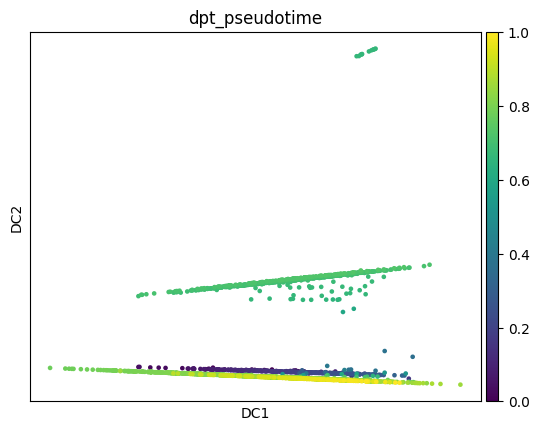

In [54]:
# Color UMAP or diffusion embedding by pseudotime:
sc.pl.diffmap(adata, color='dpt_pseudotime', components=['1,2'])